# 04.05 - Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset. In this section, we will explore one of the most useful graphs to understand the distribution of our values and more.  

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [3]:
data = np.random.randn(1000)

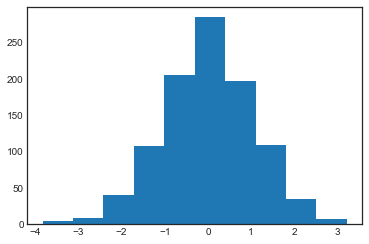

In [4]:
plt.hist(data);

The <code>hist()</code> function can be customized to fine tune both calculation and display.  

Here is an example where we specify the number of bins and other parameters. 

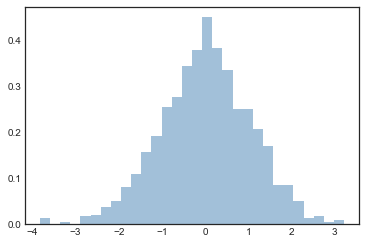

In [6]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

In [7]:
# checking what else is available
plt.hist?

A combination of <code>histtype='stepfilled'</code> and transparency <code>alpha</code> can be very useful when comparing histograms of several distributions:

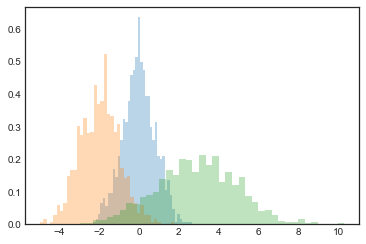

In [9]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If a graphic representation is not strictly needed, and we simply need the number of points in any given bin, we can use the function <code>np.histogram()</code>:

In [10]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 13 148 491 306  42]


### Two-Dimensional Histograms and Binnings

In [11]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### <code>plt.hist2d</code>: Two-dimensional histogram

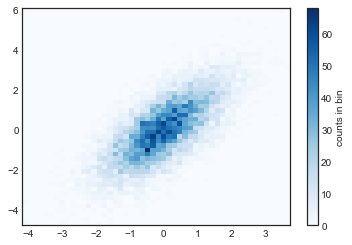

In [16]:
plt.hist2d(x, y, bins=50, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Similarly to <code>plt.hist()</code> we can simply compute (without displying) two-dimensional histograms with <code>np.histogram2d</code>:

In [13]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

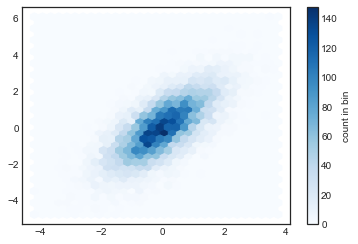

In [18]:
# exagonal binnings
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Kernel density estimation

Another common method of evaluating densities in multiple dimensions is _kernel density estimation_ (KDE), which can be thought as a way to "smooth" our function:

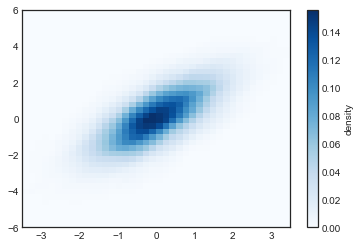

In [19]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")